In [1]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from lesson_functions import extract_features,single_img_features

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from lesson_functions import slide_window,search_windows,draw_boxes

In [5]:
from car_classifier import car_classifier

In [6]:
car_classifier = car_classifier()

In [7]:
test_img = mpimg.imread('./test_images/test3.jpg')

In [8]:
windows=slide_window(test_img, x_start_stop=[None, None], y_start_stop=[400, 650], 
                    xy_window=(32, 32), xy_overlap=(0.5, 0.5))

In [9]:
def create_windows(window_sizes,y_start_stop):
    windows = []
    for i in range(len(window_sizes)):
        yval = (np.array(y_start_stop[i])*(test_img.shape[0])/100.0)
        #print(yval)
        windows += slide_window(
        test_img, x_start_stop=[None, None], y_start_stop=[int(yval[0]),int(yval[1])],
        xy_window=(window_sizes[i], window_sizes[i]), xy_overlap=(0.8, 0.8)
        )
    return windows

In [10]:
window_sizes = [
    64,
    96,
    128,
]

y_start_stop = [
    [50, 70],
    [50, 80],
    [50, 90],
]
windows = []
for i in range(len(window_sizes)):
    yval = (np.array(y_start_stop[i])*(test_img.shape[0])/100.0)
    #print(yval)
    windows += slide_window(
        test_img, x_start_stop=[None, None], y_start_stop=[int(yval[0]),int(yval[1])],
        xy_window=(window_sizes[i], window_sizes[i]), xy_overlap=(0.8, 0.8)
    )

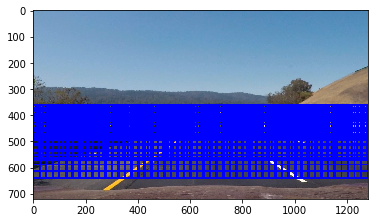

In [11]:
idea_img=draw_boxes(test_img,windows)
plt.imshow(idea_img)
plt.show()

In [12]:
from lesson_functions import draw_labeled_bboxes

In [13]:
test_img = mpimg.imread('./test_images/test6.jpg')

In [14]:
clf = car_classifier.clf
feature_scaler = car_classifier.feature_scaler

In [15]:
box_list= search_windows(test_img, windows, clf, feature_scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True)


In [16]:
boxes_img=draw_boxes(test_img,box_list)

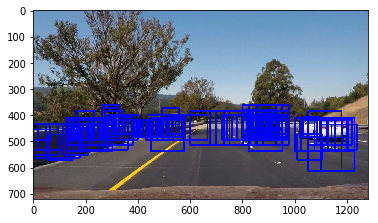

In [17]:
plt.imshow(boxes_img)
plt.show()

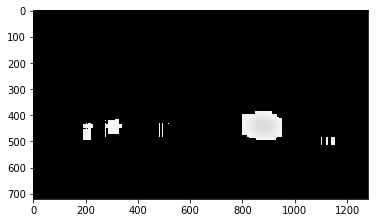

In [18]:
from HeatMapper import HeatMapper
img_shape = mpimg.imread('./test_images/test6.jpg').shape
hm = HeatMapper(img_shape)
hm.compute_heatmap(box_list,threshold=10)

plt.imshow(hm.heatmap)
plt.show()

In [19]:
from scipy.ndimage.measurements import label
labels=label(hm.heatmap)

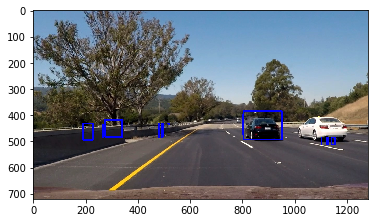

In [20]:
# Find final boxes from heatmap using label function
labels = label(hm.heatmap)
draw_img = draw_labeled_bboxes(np.copy(test_img), labels)
plt.imshow(draw_img)
plt.show()

In [29]:
from scipy.ndimage.measurements import label
def process_pipeline(img, car_classifier, heatmapper, windows,debug=False):
    
    box_list= search_windows(test_img, windows, car_classifier.clf, 
                             car_classifier.feature_scaler, 
                             car_classifier.color_space, 
                             car_classifier.spatial_size, 
                             hist_bins=32, 
                             hist_range=(0, 256), orient=9, 
                             pix_per_cell=8, cell_per_block=2, 
                             hog_channel=0, spatial_feat=True, 
                             hist_feat=True, hog_feat=True)
    #debug
    boxes_img=draw_boxes(test_img,box_list)
    
    #creat heatmap using box_list
    heatmap= heatmapper.compute_heatmap(box_list)
    
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(test_img), labels)
    
    if debug == False:
        return draw_img
    else:
        return draw_img, boxes_img

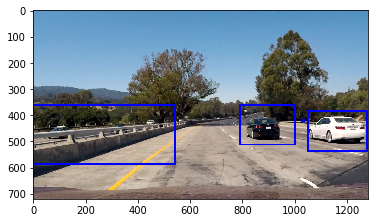

In [30]:
test_img = mpimg.imread('./test_images/test1.jpg')

from HeatMapper import HeatMapper
from car_classifier import car_classifier
img = test_img
img_shape = img.shape
window_sizes = [64,96,128]
y_start_stop = [[50, 70],[50, 80],[50, 90],]

car_classifier = car_classifier()
hmapper = HeatMapper(img_shape)
windows = create_windows(window_sizes,y_start_stop)

detect_img = process_pipeline(test_img,car_classifier,hmapper,windows)
plt.imshow(detect_img)
plt.show()

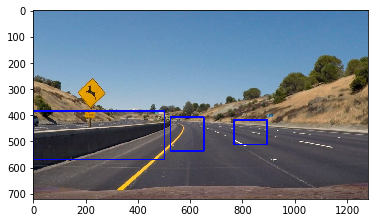

In [31]:
test_img = mpimg.imread('./test_images/test2.jpg')
detect_img = process_pipeline(test_img,car_classifier,hmapper,windows)
plt.imshow(detect_img)
plt.show()

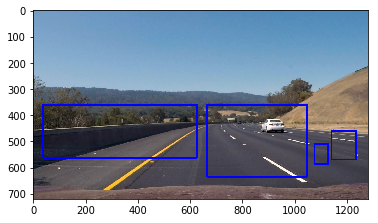

In [32]:
test_img = mpimg.imread('./test_images/test3.jpg')
detect_img = process_pipeline(test_img,car_classifier,hmapper,windows)
plt.imshow(detect_img)
plt.show()

In [ ]:
from moviepy.editor import VideoFileClip
def process_movie(input_path, output_path):
    clip = VideoFileClip(input_path)
    out_clip = clip.fl_image(process_pipeline).subclip(0,1)
    out_clip.write_videofile(output_path, audio=False)

In [ ]:
process_movie("../project_video.mp4", "../project_video_out.mp4")